In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)

import pandasql as sql

In [2]:
#load the claims data
df=pd.read_csv("adult.csv",header=0)
df_bk1=df.copy()
df.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
31342,31,Self-emp-not-inc,323020,Some-college,10,Married-civ-spouse,Other-service,Wife,White,Female,0,0,30,United-States,<=50K
20607,64,Private,164204,1st-4th,2,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,53,?,<=50K
5053,22,Private,122048,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,4416,0,40,United-States,<=50K
27882,26,Private,158333,5th-6th,3,Never-married,Transport-moving,Not-in-family,White,Male,0,0,40,Columbia,<=50K
43514,23,Private,615367,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
11908,25,State-gov,66692,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
6557,22,Private,191455,Some-college,10,Married-civ-spouse,Tech-support,Wife,Other,Female,0,0,15,United-States,<=50K
15512,35,Private,272944,Bachelors,13,Divorced,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K
39285,48,Private,109421,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,<=50K
37987,57,Private,178353,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,>50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [11]:
df['workclass']=df['workclass'].replace("?","Private")
df['workclass'].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [6]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [12]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [13]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [14]:
df['occupation']=df['occupation'].replace("?","Prof-specialty")
df['occupation'].value_counts()

Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [15]:
df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [16]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [19]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [20]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [21]:
df['native-country']=df['native-country'].replace("?","United-States")
df['native-country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [24]:
df['workclass']=le.fit_transform(df['workclass'])
df['education']=le.fit_transform(df['education'])
df['marital-status']=le.fit_transform(df['marital-status'])
df['occupation']=le.fit_transform(df['occupation'])
df['relationship']=le.fit_transform(df['relationship'])
df['race']=le.fit_transform(df['race'])
df['gender']=le.fit_transform(df['gender'])
df['native-country']=le.fit_transform(df['native-country'])
df['income']=le.fit_transform(df['income'])

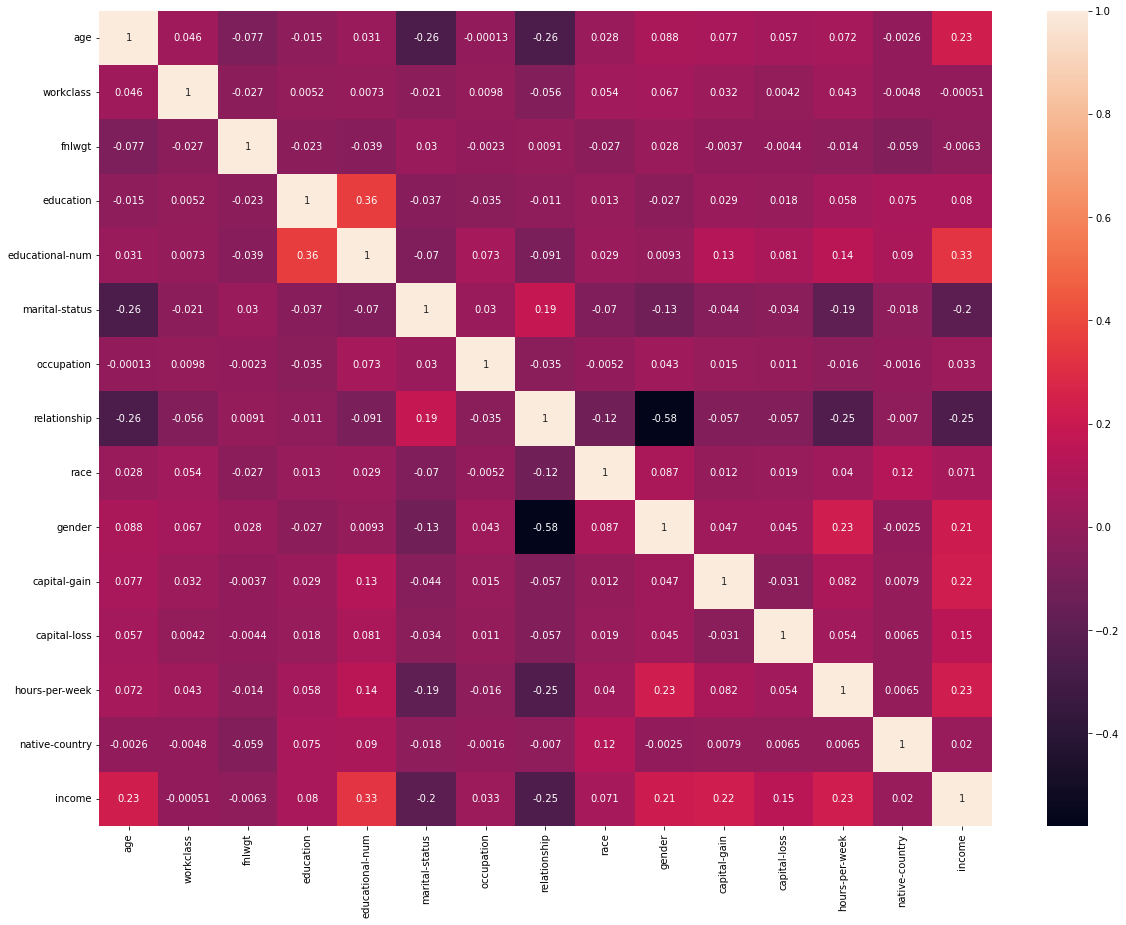

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [28]:
df_new=df.drop(columns=['workclass','fnlwgt','education','occupation','race','native-country'],axis=1)

In [30]:
d_count=df_new.income.value_counts()
print('Class 0:',d_count[0])
print('Class 1:',d_count[1])
print('Proportion: ',round(d_count[0]/d_count[1],2),': 1')
print('Total records:',len(df))

Class 0: 37155
Class 1: 11687
Proportion:  3.18 : 1
Total records: 48842


In [35]:
print(df.shape)
cd_1_dup=df_new[df_new.duplicated(keep='last')]
cd_1_dup

(48842, 15)


,age,educational-num,marital-status,relationship,gender,capital-gain,capital-loss,hours-per-week,income
0,25,7,4,3,1,0,0,40,0
1,38,9,2,0,1,0,0,50,0
2,28,12,2,0,1,0,0,40,1
3,44,10,2,0,1,7688,0,40,1
4,18,10,4,3,0,0,0,30,0
...,...,...,...,...,...,...,...,...,...
48641,58,9,2,0,1,0,0,40,0
48650,22,9,4,1,1,0,0,50,0
48661,48,10,0,1,0,0,0,40,0
48707,20,9,4,3,1,0,0,40,0


In [36]:
df_new=df_new.drop_duplicates()

In [37]:
df_new=df_new.reset_index(drop=True)
df_new

,age,educational-num,marital-status,relationship,gender,capital-gain,capital-loss,hours-per-week,income
0,25,7,4,3,1,0,0,40,0
1,38,9,2,0,1,0,0,50,0
2,28,12,2,0,1,0,0,40,1
3,44,10,2,0,1,7688,0,40,1
4,18,10,4,3,0,0,0,30,0
...,...,...,...,...,...,...,...,...,...
26811,43,11,2,0,1,0,0,45,0
26812,32,14,4,1,1,0,0,11,0
26813,27,12,2,5,0,0,0,38,0
26814,58,9,6,4,0,0,0,40,0


In [38]:
x=df_new.drop('income',axis=1)
y=df_new['income']

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18771, 8), (8045, 8), (18771,), (8045,))

In [40]:
# Scaling the features by using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0, 1))
x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)
x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [47]:
KNN_Results=pd.read_csv("KNN_Results.csv")
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[1117 1024]
 [1028 4876]]
Outcome values : 
 1117 1024 1028 4876
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.52      0.52      2141
           0       0.83      0.83      0.83      5904

    accuracy                           0.74      8045
   macro avg       0.67      0.67      0.67      8045
weighted avg       0.75      0.74      0.75      8045

Accuracy : 74.5 %
Precision : 52.1 %
Recall : 52.2 %
F1 Score : 0.521
Specificity or True Negative Rate : 82.6 %
Balanced Accuracy : 67.4 %
MCC : 0.347
roc_auc_score: 0.674


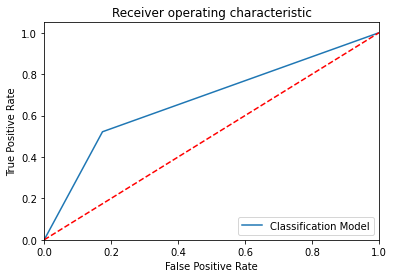

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 811 1330]
 [ 354 5550]]
Outcome values : 
 811 1330 354 5550
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.38      0.49      2141
           0       0.81      0.94      0.87      5904

    accuracy                           0.79      8045
   macro avg       0.75      0.66      0.68      8045
weighted avg       0.78      0.79      0.77      8045

Accuracy : 79.1 %
Precision : 69.6 %
Recall : 37.9 %
F1 Score : 0.491
Specificity or True Negative Rate : 94.0 %
Balanced Accuracy : 66.0 %
MCC : 0.4
roc_auc_score: 0.659


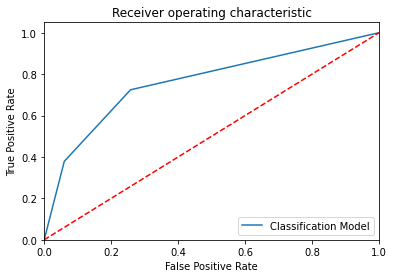

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[1163  978]
 [ 682 5222]]
Outcome values : 
 1163 978 682 5222
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.54      0.58      2141
           0       0.84      0.88      0.86      5904

    accuracy                           0.79      8045
   macro avg       0.74      0.71      0.72      8045
weighted avg       0.79      0.79      0.79      8045

Accuracy : 79.4 %
Precision : 63.0 %
Recall : 54.3 %
F1 Score : 0.584
Specificity or True Negative Rate : 88.4 %
Balanced Accuracy : 71.4 %
MCC : 0.45
roc_auc_score: 0.714


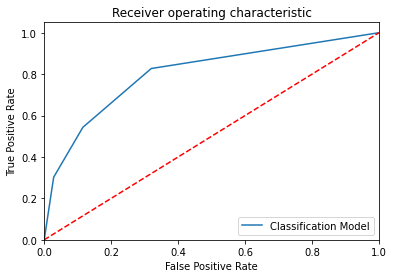

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 928 1213]
 [ 371 5533]]
Outcome values : 
 928 1213 371 5533
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.43      0.54      2141
           0       0.82      0.94      0.87      5904

    accuracy                           0.80      8045
   macro avg       0.77      0.69      0.71      8045
weighted avg       0.79      0.80      0.79      8045

Accuracy : 80.3 %
Precision : 71.4 %
Recall : 43.3 %
F1 Score : 0.54
Specificity or True Negative Rate : 93.7 %
Balanced Accuracy : 68.5 %
MCC : 0.445
roc_auc_score: 0.685


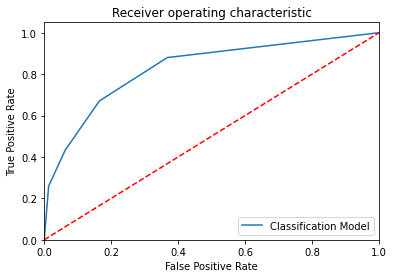

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[1179  962]
 [ 588 5316]]
Outcome values : 
 1179 962 588 5316
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.55      0.60      2141
           0       0.85      0.90      0.87      5904

    accuracy                           0.81      8045
   macro avg       0.76      0.73      0.74      8045
weighted avg       0.80      0.81      0.80      8045

Accuracy : 80.7 %
Precision : 66.7 %
Recall : 55.1 %
F1 Score : 0.603
Specificity or True Negative Rate : 90.0 %
Balanced Accuracy : 72.6 %
MCC : 0.482
roc_auc_score: 0.726


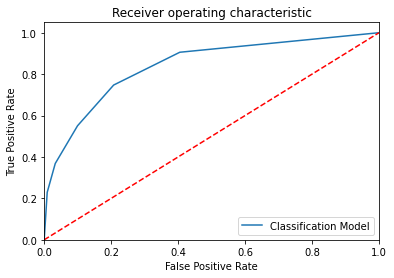

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 972 1169]
 [ 344 5560]]
Outcome values : 
 972 1169 344 5560
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.45      0.56      2141
           0       0.83      0.94      0.88      5904

    accuracy                           0.81      8045
   macro avg       0.78      0.70      0.72      8045
weighted avg       0.80      0.81      0.80      8045

Accuracy : 81.2 %
Precision : 73.9 %
Recall : 45.4 %
F1 Score : 0.562
Specificity or True Negative Rate : 94.2 %
Balanced Accuracy : 69.8 %
MCC : 0.473
roc_auc_score: 0.698


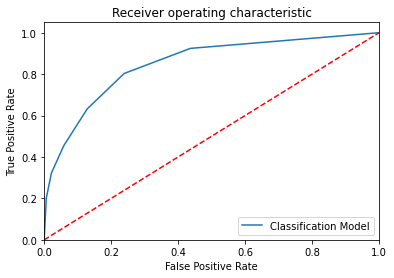

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[1160  981]
 [ 506 5398]]
Outcome values : 
 1160 981 506 5398
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.54      0.61      2141
           0       0.85      0.91      0.88      5904

    accuracy                           0.82      8045
   macro avg       0.77      0.73      0.74      8045
weighted avg       0.81      0.82      0.81      8045

Accuracy : 81.5 %
Precision : 69.6 %
Recall : 54.2 %
F1 Score : 0.609
Specificity or True Negative Rate : 91.4 %
Balanced Accuracy : 72.8 %
MCC : 0.497
roc_auc_score: 0.728


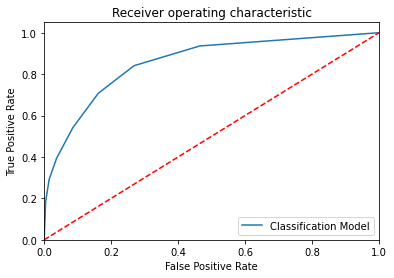

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[1009 1132]
 [ 345 5559]]
Outcome values : 
 1009 1132 345 5559
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.47      0.58      2141
           0       0.83      0.94      0.88      5904

    accuracy                           0.82      8045
   macro avg       0.79      0.71      0.73      8045
weighted avg       0.81      0.82      0.80      8045

Accuracy : 81.6 %
Precision : 74.5 %
Recall : 47.1 %
F1 Score : 0.577
Specificity or True Negative Rate : 94.2 %
Balanced Accuracy : 70.6 %
MCC : 0.488
roc_auc_score: 0.706


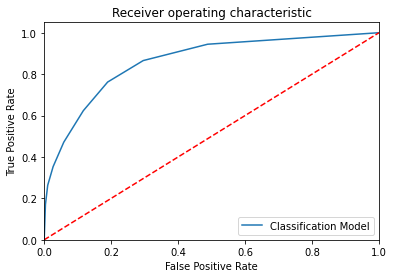

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[1160  981]
 [ 483 5421]]
Outcome values : 
 1160 981 483 5421
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.54      0.61      2141
           0       0.85      0.92      0.88      5904

    accuracy                           0.82      8045
   macro avg       0.78      0.73      0.75      8045
weighted avg       0.81      0.82      0.81      8045

Accuracy : 81.8 %
Precision : 70.6 %
Recall : 54.2 %
F1 Score : 0.613
Specificity or True Negative Rate : 91.8 %
Balanced Accuracy : 73.0 %
MCC : 0.504
roc_auc_score: 0.73


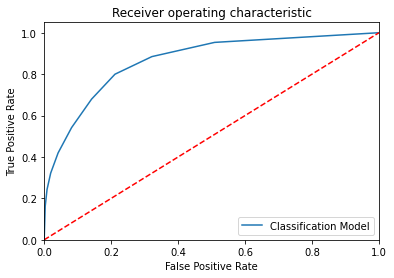

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[1042 1099]
 [ 345 5559]]
Outcome values : 
 1042 1099 345 5559
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.49      0.59      2141
           0       0.83      0.94      0.89      5904

    accuracy                           0.82      8045
   macro avg       0.79      0.71      0.74      8045
weighted avg       0.81      0.82      0.81      8045

Accuracy : 82.1 %
Precision : 75.1 %
Recall : 48.7 %
F1 Score : 0.591
Specificity or True Negative Rate : 94.2 %
Balanced Accuracy : 71.4 %
MCC : 0.501
roc_auc_score: 0.714


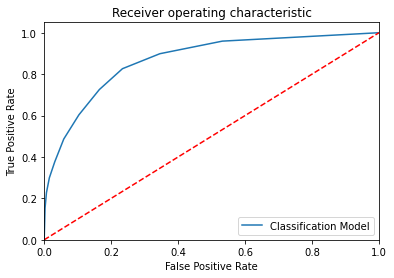

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[1153  988]
 [ 459 5445]]
Outcome values : 
 1153 988 459 5445
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.54      0.61      2141
           0       0.85      0.92      0.88      5904

    accuracy                           0.82      8045
   macro avg       0.78      0.73      0.75      8045
weighted avg       0.81      0.82      0.81      8045

Accuracy : 82.0 %
Precision : 71.5 %
Recall : 53.9 %
F1 Score : 0.614
Specificity or True Negative Rate : 92.2 %
Balanced Accuracy : 73.0 %
MCC : 0.509
roc_auc_score: 0.73


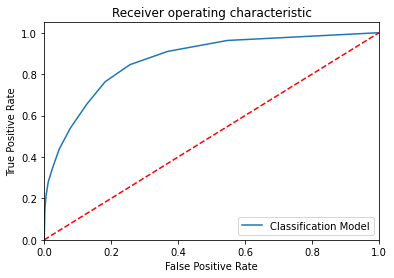

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[1048 1093]
 [ 351 5553]]
Outcome values : 
 1048 1093 351 5553
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.49      0.59      2141
           0       0.84      0.94      0.88      5904

    accuracy                           0.82      8045
   macro avg       0.79      0.72      0.74      8045
weighted avg       0.81      0.82      0.81      8045

Accuracy : 82.1 %
Precision : 74.9 %
Recall : 48.9 %
F1 Score : 0.592
Specificity or True Negative Rate : 94.1 %
Balanced Accuracy : 71.5 %
MCC : 0.501
roc_auc_score: 0.715


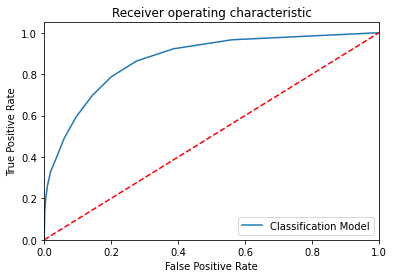

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[1150  991]
 [ 441 5463]]
Outcome values : 
 1150 991 441 5463
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.54      0.62      2141
           0       0.85      0.93      0.88      5904

    accuracy                           0.82      8045
   macro avg       0.78      0.73      0.75      8045
weighted avg       0.81      0.82      0.81      8045

Accuracy : 82.2 %
Precision : 72.3 %
Recall : 53.7 %
F1 Score : 0.616
Specificity or True Negative Rate : 92.5 %
Balanced Accuracy : 73.1 %
MCC : 0.513
roc_auc_score: 0.731


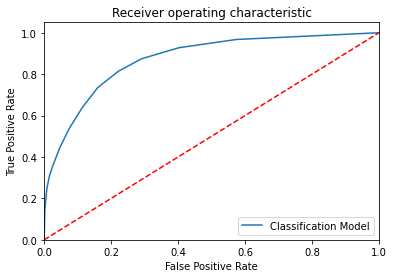

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[1064 1077]
 [ 350 5554]]
Outcome values : 
 1064 1077 350 5554
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.50      0.60      2141
           0       0.84      0.94      0.89      5904

    accuracy                           0.82      8045
   macro avg       0.80      0.72      0.74      8045
weighted avg       0.81      0.82      0.81      8045

Accuracy : 82.3 %
Precision : 75.2 %
Recall : 49.7 %
F1 Score : 0.599
Specificity or True Negative Rate : 94.1 %
Balanced Accuracy : 71.9 %
MCC : 0.508
roc_auc_score: 0.719


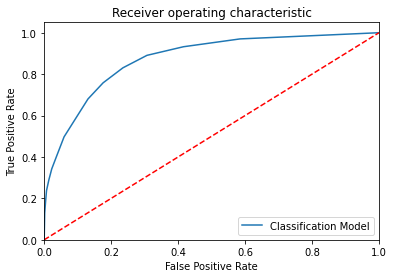

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[1151  990]
 [ 442 5462]]
Outcome values : 
 1151 990 442 5462
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.54      0.62      2141
           0       0.85      0.93      0.88      5904

    accuracy                           0.82      8045
   macro avg       0.78      0.73      0.75      8045
weighted avg       0.81      0.82      0.81      8045

Accuracy : 82.2 %
Precision : 72.3 %
Recall : 53.8 %
F1 Score : 0.616
Specificity or True Negative Rate : 92.5 %
Balanced Accuracy : 73.2 %
MCC : 0.513
roc_auc_score: 0.731


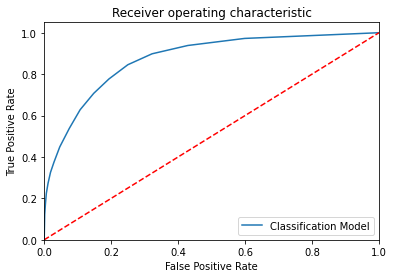

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[1069 1072]
 [ 355 5549]]
Outcome values : 
 1069 1072 355 5549
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.50      0.60      2141
           0       0.84      0.94      0.89      5904

    accuracy                           0.82      8045
   macro avg       0.79      0.72      0.74      8045
weighted avg       0.81      0.82      0.81      8045

Accuracy : 82.3 %
Precision : 75.1 %
Recall : 49.9 %
F1 Score : 0.6
Specificity or True Negative Rate : 94.0 %
Balanced Accuracy : 72.0 %
MCC : 0.509
roc_auc_score: 0.72


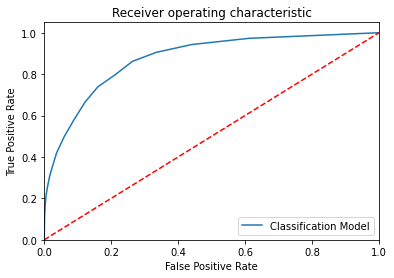

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[1146  995]
 [ 434 5470]]
Outcome values : 
 1146 995 434 5470
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.54      0.62      2141
           0       0.85      0.93      0.88      5904

    accuracy                           0.82      8045
   macro avg       0.79      0.73      0.75      8045
weighted avg       0.81      0.82      0.81      8045

Accuracy : 82.2 %
Precision : 72.5 %
Recall : 53.5 %
F1 Score : 0.616
Specificity or True Negative Rate : 92.6 %
Balanced Accuracy : 73.0 %
MCC : 0.514
roc_auc_score: 0.731


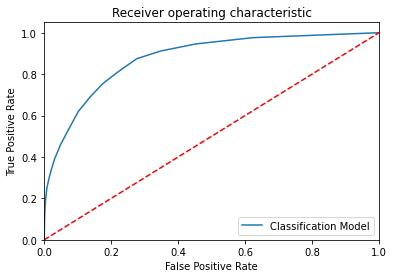

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[1066 1075]
 [ 345 5559]]
Outcome values : 
 1066 1075 345 5559
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.50      0.60      2141
           0       0.84      0.94      0.89      5904

    accuracy                           0.82      8045
   macro avg       0.80      0.72      0.74      8045
weighted avg       0.82      0.82      0.81      8045

Accuracy : 82.3 %
Precision : 75.5 %
Recall : 49.8 %
F1 Score : 0.6
Specificity or True Negative Rate : 94.2 %
Balanced Accuracy : 72.0 %
MCC : 0.511
roc_auc_score: 0.72


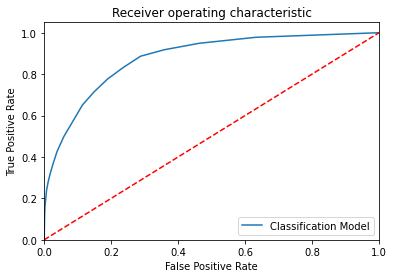

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[1131 1010]
 [ 409 5495]]
Outcome values : 
 1131 1010 409 5495
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.53      0.61      2141
           0       0.84      0.93      0.89      5904

    accuracy                           0.82      8045
   macro avg       0.79      0.73      0.75      8045
weighted avg       0.82      0.82      0.81      8045

Accuracy : 82.4 %
Precision : 73.4 %
Recall : 52.8 %
F1 Score : 0.615
Specificity or True Negative Rate : 93.1 %
Balanced Accuracy : 73.0 %
MCC : 0.516
roc_auc_score: 0.729


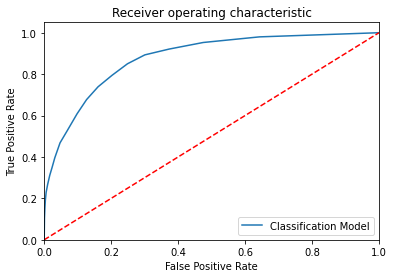

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[1068 1073]
 [ 341 5563]]
Outcome values : 
 1068 1073 341 5563
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.50      0.60      2141
           0       0.84      0.94      0.89      5904

    accuracy                           0.82      8045
   macro avg       0.80      0.72      0.74      8045
weighted avg       0.82      0.82      0.81      8045

Accuracy : 82.4 %
Precision : 75.8 %
Recall : 49.9 %
F1 Score : 0.602
Specificity or True Negative Rate : 94.2 %
Balanced Accuracy : 72.0 %
MCC : 0.513
roc_auc_score: 0.721


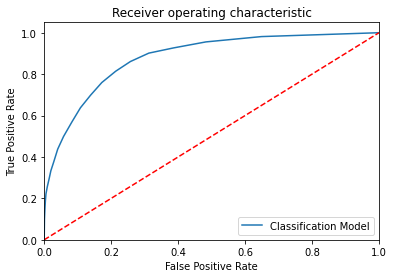

In [48]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [49]:
KNN_Results

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,1117,1024,1028,4876,0.745,0.521,0.522,0.521,0.826,0.347,0.6738,0.674
1,KNeighborsClassifier(n_neighbors=2),2,811,1330,354,5550,0.791,0.696,0.379,0.491,0.94,0.4,0.659418,0.66
2,KNeighborsClassifier(n_neighbors=3),3,1163,978,682,5222,0.794,0.63,0.543,0.584,0.884,0.45,0.713845,0.714
3,KNeighborsClassifier(n_neighbors=4),4,928,1213,371,5533,0.803,0.714,0.433,0.54,0.937,0.445,0.685302,0.685
4,KNeighborsClassifier(),5,1179,962,588,5316,0.807,0.667,0.551,0.603,0.9,0.482,0.725542,0.726
5,KNeighborsClassifier(n_neighbors=6),6,972,1169,344,5560,0.812,0.739,0.454,0.562,0.942,0.473,0.697864,0.698
6,KNeighborsClassifier(n_neighbors=7),7,1160,981,506,5398,0.815,0.696,0.542,0.609,0.914,0.497,0.728049,0.728
7,KNeighborsClassifier(n_neighbors=8),8,1009,1132,345,5559,0.816,0.745,0.471,0.577,0.942,0.488,0.70642,0.706
8,KNeighborsClassifier(n_neighbors=9),9,1160,981,483,5421,0.818,0.706,0.542,0.613,0.918,0.504,0.729997,0.73
9,KNeighborsClassifier(n_neighbors=10),10,1042,1099,345,5559,0.821,0.751,0.487,0.591,0.942,0.501,0.714127,0.714


In [55]:
EMResults=pd.read_csv("EMResults.csv")

Model Name:  LogisticRegression()
Confusion matrix : 
 [[1009 1132]
 [ 328 5576]]
Outcome values : 
 1009 1132 328 5576
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.47      0.58      2141
           0       0.83      0.94      0.88      5904

    accuracy                           0.82      8045
   macro avg       0.79      0.71      0.73      8045
weighted avg       0.81      0.82      0.80      8045

Accuracy : 81.9 %
Precision : 75.5 %
Recall : 47.1 %
F1 Score : 0.58
Specificity or True Negative Rate : 94.4 %
Balanced Accuracy : 70.8 %
MCC : 0.494
roc_auc_score: 0.708


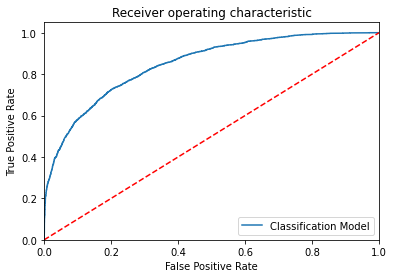

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 996 1145]
 [ 884 5020]]
Outcome values : 
 996 1145 884 5020
Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.47      0.50      2141
           0       0.81      0.85      0.83      5904

    accuracy                           0.75      8045
   macro avg       0.67      0.66      0.66      8045
weighted avg       0.74      0.75      0.74      8045

Accuracy : 74.8 %
Precision : 53.0 %
Recall : 46.5 %
F1 Score : 0.495
Specificity or True Negative Rate : 85.0 %
Balanced Accuracy : 65.8 %
MCC : 0.329
roc_auc_score: 0.658


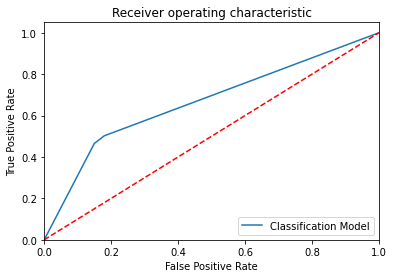

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[1119 1022]
 [ 684 5220]]
Outcome values : 
 1119 1022 684 5220
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.52      0.57      2141
           0       0.84      0.88      0.86      5904

    accuracy                           0.79      8045
   macro avg       0.73      0.70      0.71      8045
weighted avg       0.78      0.79      0.78      8045

Accuracy : 78.8 %
Precision : 62.1 %
Recall : 52.3 %
F1 Score : 0.567
Specificity or True Negative Rate : 88.4 %
Balanced Accuracy : 70.4 %
MCC : 0.431
roc_auc_score: 0.703


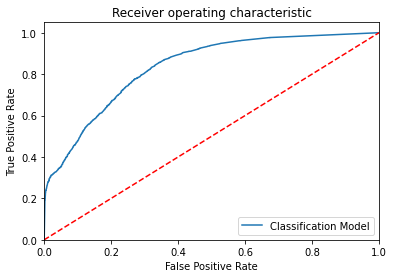

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[1126 1015]
 [ 738 5166]]
Outcome values : 
 1126 1015 738 5166
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.53      0.56      2141
           0       0.84      0.88      0.85      5904

    accuracy                           0.78      8045
   macro avg       0.72      0.70      0.71      8045
weighted avg       0.77      0.78      0.78      8045

Accuracy : 78.2 %
Precision : 60.4 %
Recall : 52.6 %
F1 Score : 0.562
Specificity or True Negative Rate : 87.5 %
Balanced Accuracy : 70.0 %
MCC : 0.42
roc_auc_score: 0.7


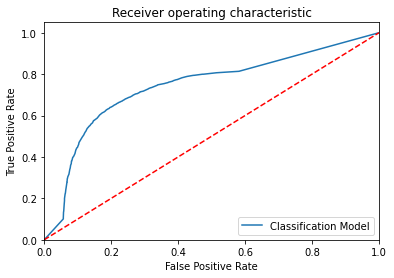

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[1042 1099]
 [ 345 5559]]
Outcome values : 
 1042 1099 345 5559
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.49      0.59      2141
           0       0.83      0.94      0.89      5904

    accuracy                           0.82      8045
   macro avg       0.79      0.71      0.74      8045
weighted avg       0.81      0.82      0.81      8045

Accuracy : 82.1 %
Precision : 75.1 %
Recall : 48.7 %
F1 Score : 0.591
Specificity or True Negative Rate : 94.2 %
Balanced Accuracy : 71.4 %
MCC : 0.501
roc_auc_score: 0.714


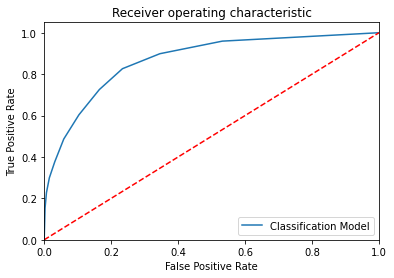

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 989 1152]
 [ 402 5502]]
Outcome values : 
 989 1152 402 5502
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.46      0.56      2141
           0       0.83      0.93      0.88      5904

    accuracy                           0.81      8045
   macro avg       0.77      0.70      0.72      8045
weighted avg       0.80      0.81      0.79      8045

Accuracy : 80.7 %
Precision : 71.1 %
Recall : 46.2 %
F1 Score : 0.56
Specificity or True Negative Rate : 93.2 %
Balanced Accuracy : 69.7 %
MCC : 0.46
roc_auc_score: 0.697


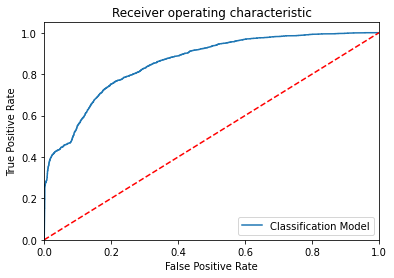

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[1207  934]
 [ 318 5586]]
Outcome values : 
 1207 934 318 5586
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.56      0.66      2141
           0       0.86      0.95      0.90      5904

    accuracy                           0.84      8045
   macro avg       0.82      0.75      0.78      8045
weighted avg       0.84      0.84      0.84      8045

Accuracy : 84.4 %
Precision : 79.1 %
Recall : 56.4 %
F1 Score : 0.658
Specificity or True Negative Rate : 94.6 %
Balanced Accuracy : 75.5 %
MCC : 0.575
roc_auc_score: 0.755


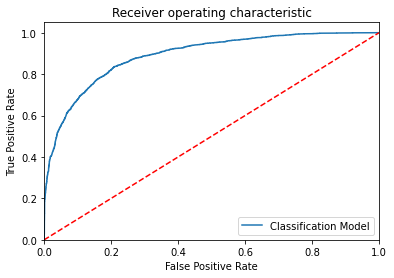

-----------------------------------------------------------------------------------------------------


In [56]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=10)
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN,ModelGNB,ModelSVM]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>


In [57]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),1009,1132,328,5576,0.819,0.755,0.471,0.58,0.944,0.494,0.70786,0.708
1,DecisionTreeClassifier(),996,1145,884,5020,0.748,0.53,0.465,0.495,0.85,0.329,0.657737,0.658
2,"(DecisionTreeClassifier(max_features='auto', r...",1119,1022,684,5220,0.788,0.621,0.523,0.567,0.884,0.431,0.7034,0.704
3,"(ExtraTreeClassifier(random_state=377013251), ...",1126,1015,738,5166,0.782,0.604,0.526,0.562,0.875,0.42,0.700461,0.7
4,KNeighborsClassifier(n_neighbors=10),1042,1099,345,5559,0.821,0.751,0.487,0.591,0.942,0.501,0.714127,0.714
5,GaussianNB(),989,1152,402,5502,0.807,0.711,0.462,0.56,0.932,0.46,0.696922,0.697
6,SVC(probability=True),1207,934,318,5586,0.844,0.791,0.564,0.658,0.946,0.575,0.754947,0.755


In [58]:
y_pred=ModelSVM.predict(x_test)

In [59]:
Results=pd.DataFrame({'income_A':y_test, 'income_P':y_pred})

# Merge two Dataframes on index of both the dataframes
ResultsFinal=df.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly
ResultsFinal.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_A,income_P
14557,24,3,214542,15,10,4,9,1,4,1,0,0,60,38,0,0,0
24900,30,3,185177,9,13,2,3,0,4,1,0,0,43,38,0,0,0
6536,25,3,393456,11,9,4,6,4,2,0,0,0,40,38,0,0,0
945,38,3,216319,10,16,2,9,0,1,1,0,0,40,2,1,0,0
13885,63,3,130968,6,5,0,13,1,4,1,0,0,50,38,0,0,0
